<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 20px; 
    margin: 0 auto; 
    font-size: 2em; 
    font-family: Arial, sans-serif; 
    background-color: #480CA8; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>Fish Clustering: K-Means, Agglomerative Clustering, DBSCAN, Gaussian Mixture</strong>
</div>

![fish](https://img.freepik.com/free-vector/cute-underwater-animals-fish-seahorse-jellyfish-octopus-vector-cartoon-set-aquarium-characters-funny-marine-creatures-puffer-fish-isolated-black-background_107791-10364.jpg?t=st=1727454528~exp=1727458128~hmac=897f710448f4a156c45c9ece16702960931ffd6cc25f1d26c413f5767b0cfc50&w=2000)

<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.8em; 
    font-family: Arial, sans-serif; 
    background-color: #7209B7; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>1. Introduction</strong>
</div>

<div style="border: 2px solid #7209B7; padding: 15px; border-radius: 10px;">
    <p style="font-size: 16px">
        In this project, we compare clustering techniques on a fish species dataset. While the true species labels are available, we withhold them during the clustering process, using them only at the end to evaluate the results.
    </p>
    <p style="font-size: 16px">
        We apply <strong>KMeans</strong>, <strong>Agglomerative Clustering</strong>, <strong>DBSCAN</strong>, and <strong>Gaussian Mixture</strong> to identify 9 clusters, corresponding to the 9 known species, and compare them to the true labels.
    </p>
    <p style="font-size: 16px">
        Clustering is a <strong>powerful tool</strong> in data analysis, revealing hidden patterns and naturally grouping similar objects based on features, making it essential for exploratory analysis.
    </p>
    <p style="font-size: 16px">
        By the end, we will evaluate how well each method aligns with the actual species, offering insights into the best-performing technique for this data.
    </p>
</div>

<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.8em; 
    font-family: Arial, sans-serif; 
    background-color: #7209B7; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>2. Import Libraries and Data</strong>
</div>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import seaborn as sns
%matplotlib inline

palette1 = ["#f72585", "#b5179e", "#7A0CC3", "#560bad", "#330A92", "#3f37c9", "#4361ee", "#4895ef", "#4cc9f0"]
palette2 = ["#2C7B7B", "#004D4A", "#D02748", "#F9E03B",  "#F0C808", "#D5A2D5", "#3E2A63", "#6BC6D3", "#007BA8"]
sns.set_theme(context='notebook', palette=palette2, style='darkgrid')

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("fish_data.csv")

<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.8em; 
    font-family: Arial, sans-serif; 
    background-color: #7209B7; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>3. Data Exploration</strong>
</div>

In [3]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [5]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

109

In [8]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(3971, 4)

In [10]:
X = df.drop('species', axis=1)
y = df.species

In [11]:
## Detecting Outliers

# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(X))

# Generate descriptive statistics for the z-scores
print("Descriptive Statistics for Z-Scores")
display(z_scores.describe().round(3))

Descriptive Statistics for Z-Scores


,length,weight,w_l_ratio
count,3971.000,3971.000,3971.000
mean,-0.000,-0.000,-0.000
std,1.000,1.000,1.000
min,-1.554,-1.629,-1.404
25%,-0.846,-0.639,-0.670
50%,0.003,-0.407,-0.507
75%,0.736,0.350,0.717
max,2.339,2.485,3.163


<div style="padding: 20px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #7209B7; width: 75%; margin: 0 auto;">
    <p style="font-size: 20px; font-family: 'Arial'; line-height: 1.5em;">
    Initial data exploration reveals the following key points:
    <ul>
        <li>🌟 <strong>Data Cleanliness:</strong> The dataset is very clean and well-prepared for analysis.</li>
        <li>✅ <strong>Missing Values:</strong> There are no missing values in the dataset.</li>
        <li>🔢 <strong>Numerical Features:</strong> The dataset includes 3 numerical feature columns.</li>
        <li>🔄 <strong>Duplicates Removed:</strong> We found 109 duplicates, which have been dropped.</li>
        <li>📉 <strong>Row Adjustment:</strong> After dropping, the dataset now contains 3,971 rows.</li>
        <li>🚫 <strong>Outliers:</strong> There are no outliers present in the dataset.</li>
    </ul>
    </p>
</div>

<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.8em; 
    font-family: Arial, sans-serif; 
    background-color: #7209B7; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>4. Data Visualization</strong>
</div>

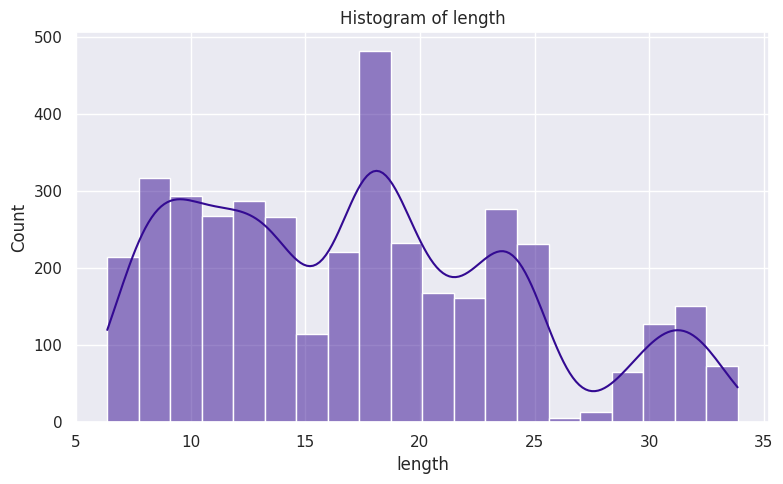

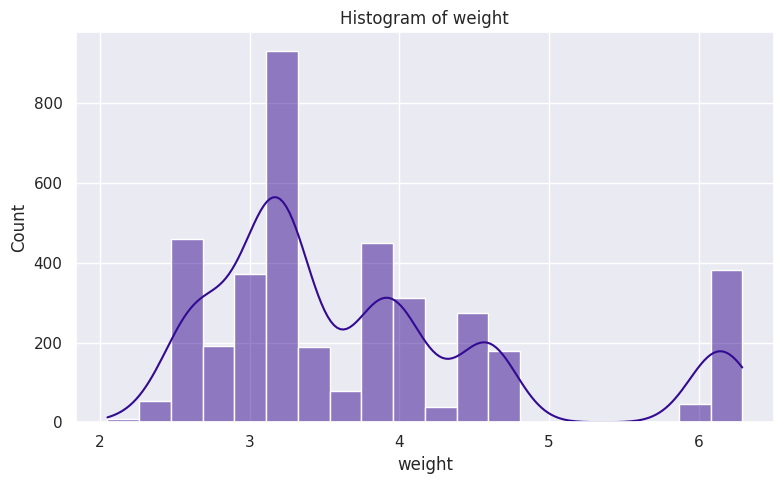

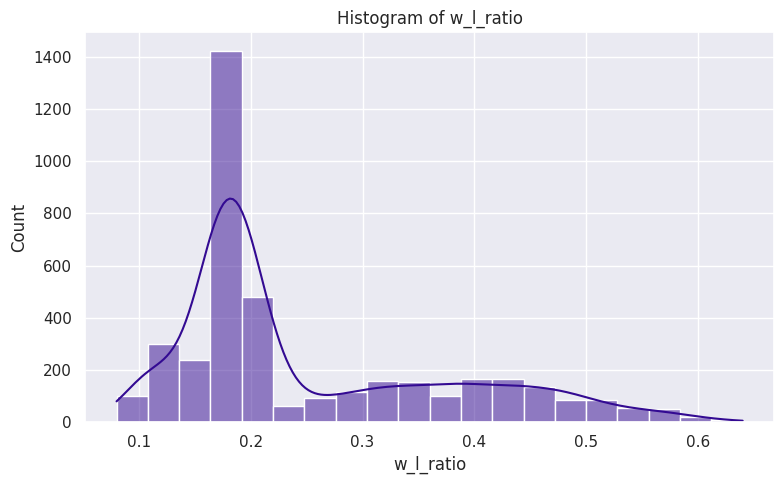

In [12]:
# Plot histograms for each column
for column in X:
   
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20, color=palette1[4])
    plt.title(f'Histogram of {column}')
    
    plt.tight_layout()
    plt.show()

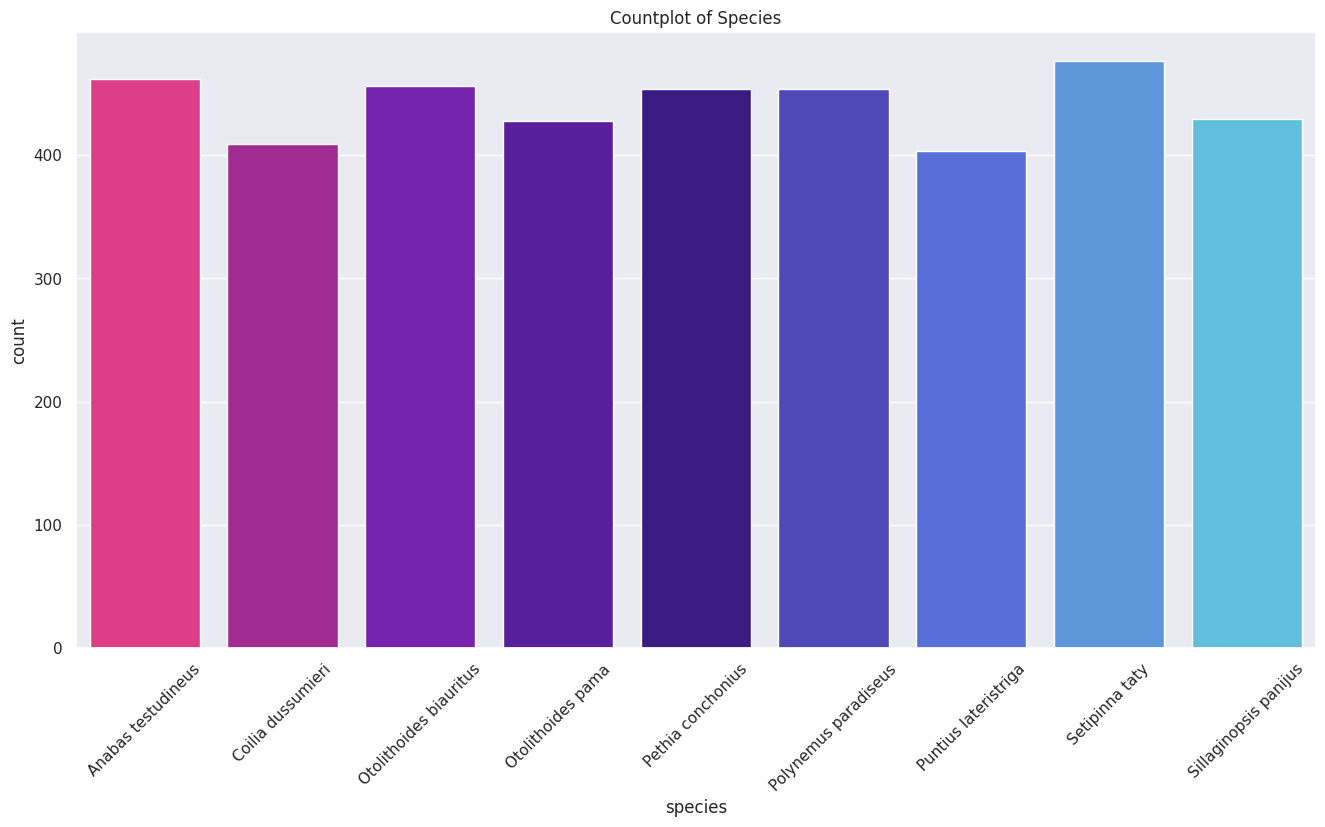

In [13]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='species', palette=palette1)
plt.title(f'Countplot of Species')
plt.xticks(rotation=45)

plt.show()

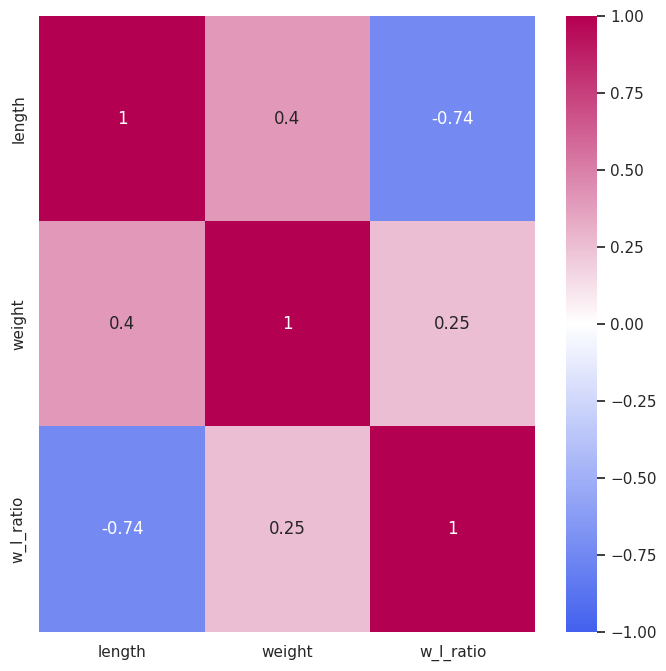

In [14]:
# Define the custom colormap
colors = ["#4361EE", "#FFFFFF", "#B40051"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Example correlation matrix
corr_df= df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_df, cmap=cmap, center=0, vmin=-1, annot=True)
plt.show()

<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.8em; 
    font-family: Arial, sans-serif; 
    background-color: #7209B7; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>5. Clustering Algorithms</strong>
</div>

In [15]:
# Instantiate Scaler
scaler = MinMaxScaler()

# fit_transform
X_scaled = scaler.fit_transform(X)

<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.3em; 
    font-family: Arial, sans-serif; 
    background-color: #560BAD; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>5.1. KMeans</strong>
</div>

In [16]:
# Initialize the KMeans algorithm with 9 clusters and a maximum of 100 iterations
kmeans = KMeans(n_clusters=9, max_iter=100)

# Fit the model and predict cluster labels
y_kmeans = kmeans.fit_predict(X_scaled)

In [17]:
# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(X_scaled)

pd.DataFrame(X_transformed, columns=X.columns).head()

,length,weight,w_l_ratio
0,10.66,3.45,0.32
1,6.91,3.27,0.47
2,8.38,3.46,0.41
3,7.57,3.36,0.44
4,10.83,3.38,0.31


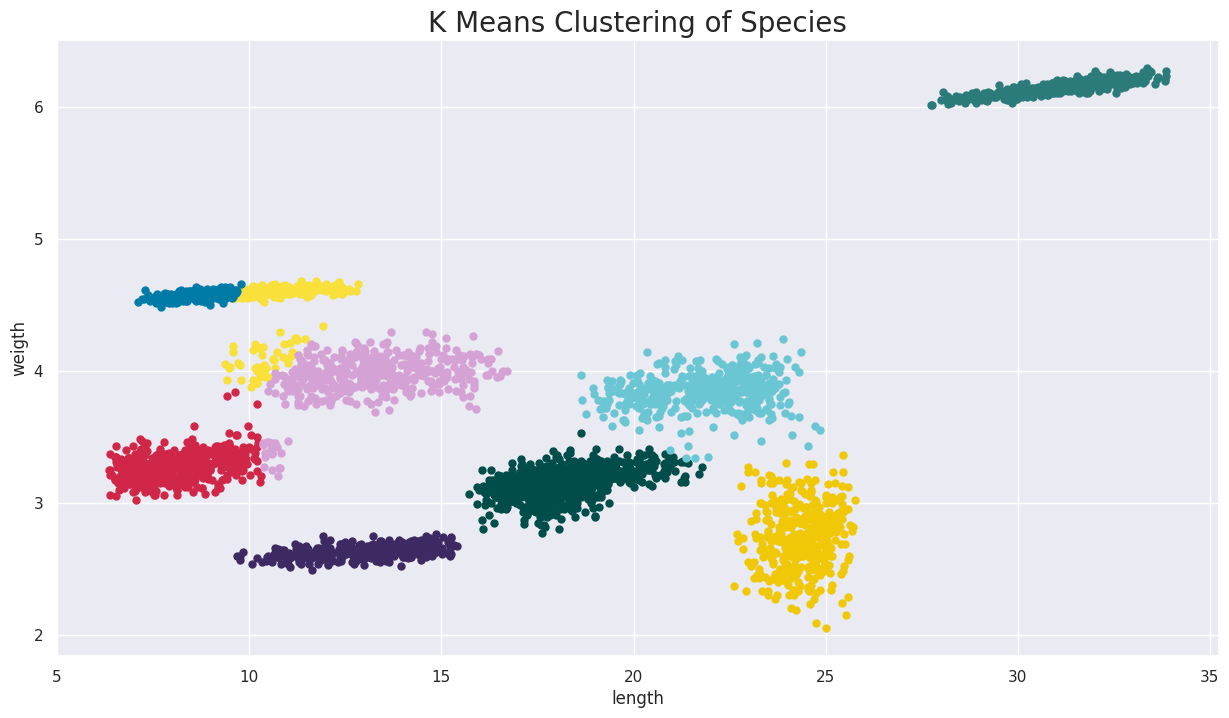

In [18]:
# Visualising the clusters
plt.figure(figsize= (15,8))

for i in range(9):
    plt.scatter(X_transformed[y_kmeans == i, 0], X_transformed[y_kmeans == i, 1], s=25)

plt.title('K Means Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weigth')

plt.show()

<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.3em; 
    font-family: Arial, sans-serif; 
    background-color: #560BAD; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>5.2. Agglomerative Clustering</strong>
</div>

In [19]:
# Initialize the Agglomerative Clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=9)

# Fit the model and predict cluster labels
y_agg = agg_clustering.fit_predict(X_scaled)

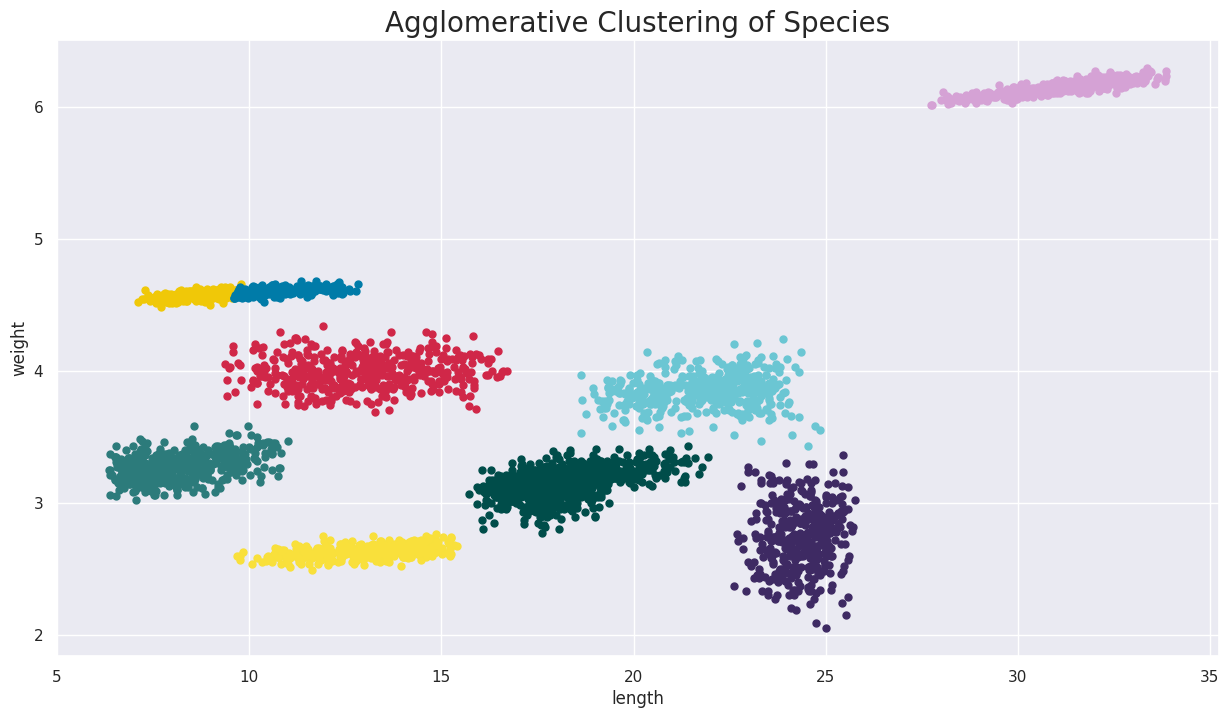

In [20]:
# Visualize the clusters
plt.figure(figsize=(15,8))

for i in range(9):
    plt.scatter(X_transformed[y_agg == i, 0], X_transformed[y_agg == i, 1], s=25)

plt.title('Agglomerative Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.3em; 
    font-family: Arial, sans-serif; 
    background-color: #560BAD; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>5.3. Gaussian Mixture</strong>
</div>

In [21]:
# Initialize Gaussian Mixture Model with 9 clusters
gmm = GaussianMixture(n_components=9, random_state=101)

# Fit the model and predict cluster labels
y_gmm = gmm.fit_predict(X_scaled)

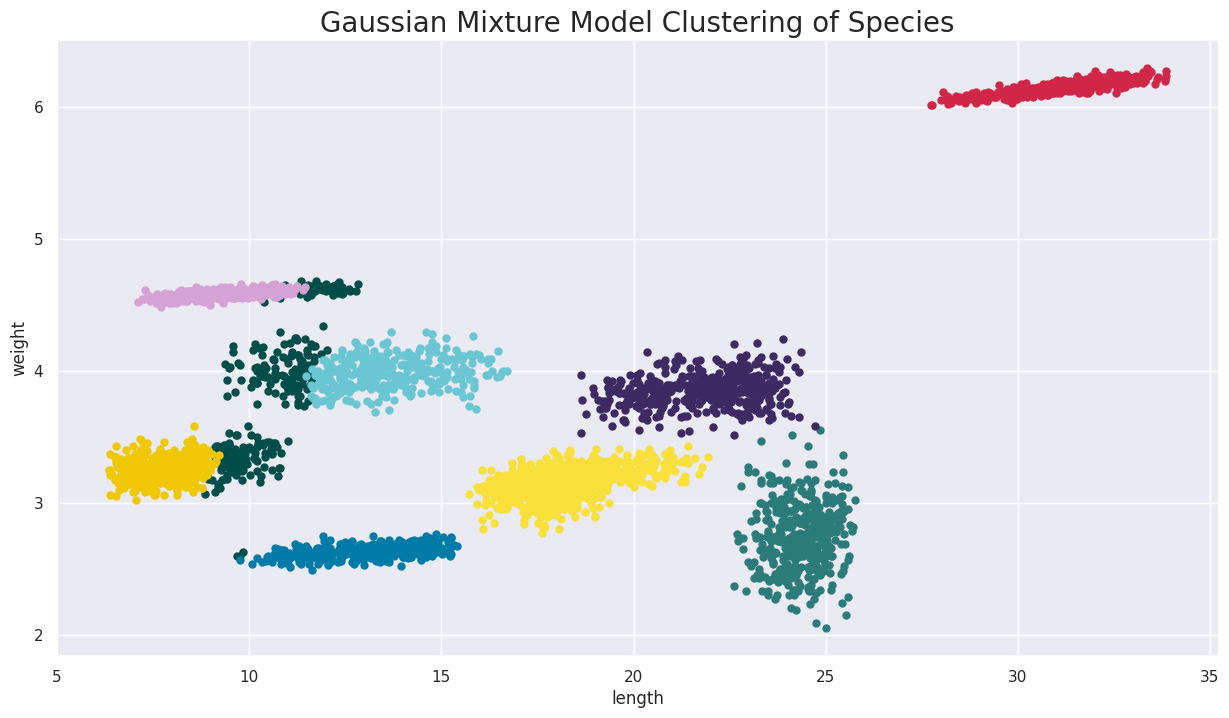

In [22]:
# Visualize the clusters
plt.figure(figsize=(15,8))

for i in range(9):
    plt.scatter(X_transformed[y_gmm == i, 0], X_transformed[y_gmm == i, 1], s=25)

plt.title('Gaussian Mixture Model Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.3em; 
    font-family: Arial, sans-serif; 
    background-color: #560BAD; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>5.4. DBSCAN </b></strong>
</div>

In [23]:
# Initialize DBSCAN (adjusted eps and min_samples)
dbscan = DBSCAN(eps=0.03, min_samples=5)

# Fit the model and predict cluster labels
y_dbscan = dbscan.fit_predict(X_scaled)

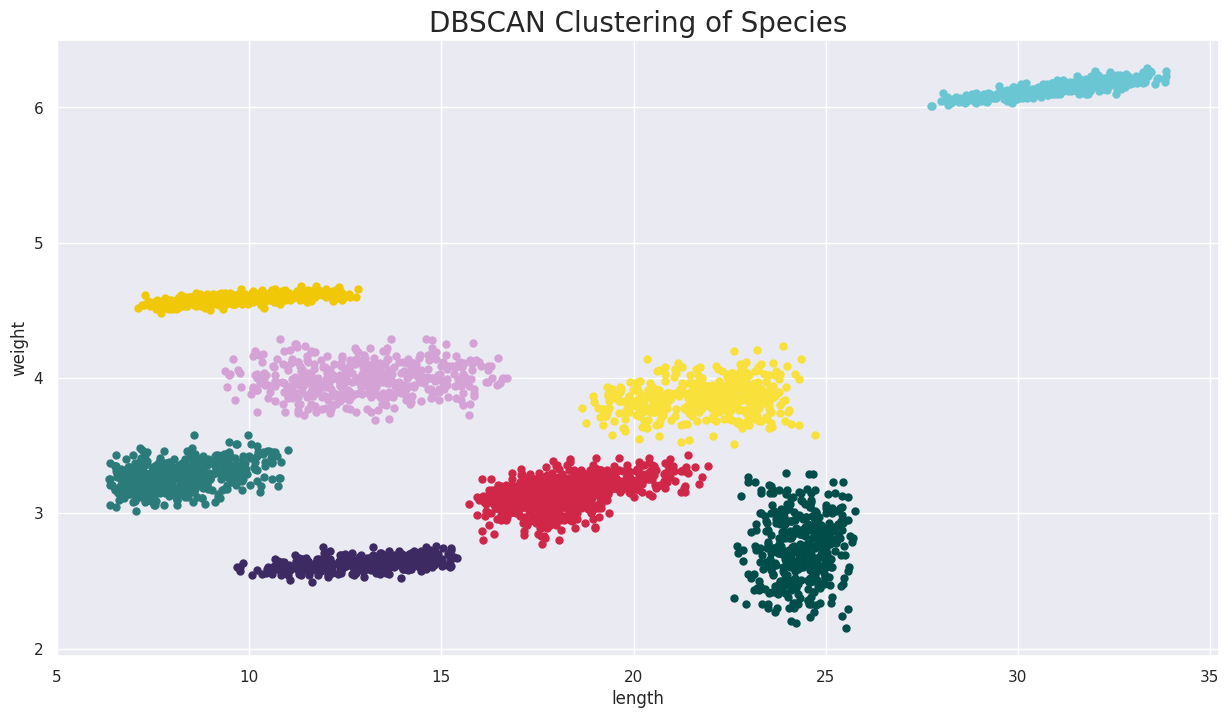

In [24]:
# Visualize the clusters (Note: DBSCAN might have noise points labeled as -1)
plt.figure(figsize=(15,8))

for i in range(9):
    plt.scatter(X_transformed[y_dbscan == i, 0], X_transformed[y_dbscan == i, 1], s=25)

plt.title('DBSCAN Clustering of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.3em; 
    font-family: Arial, sans-serif; 
    background-color: #560BAD; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>5.5. True Clusters</strong>
</div>

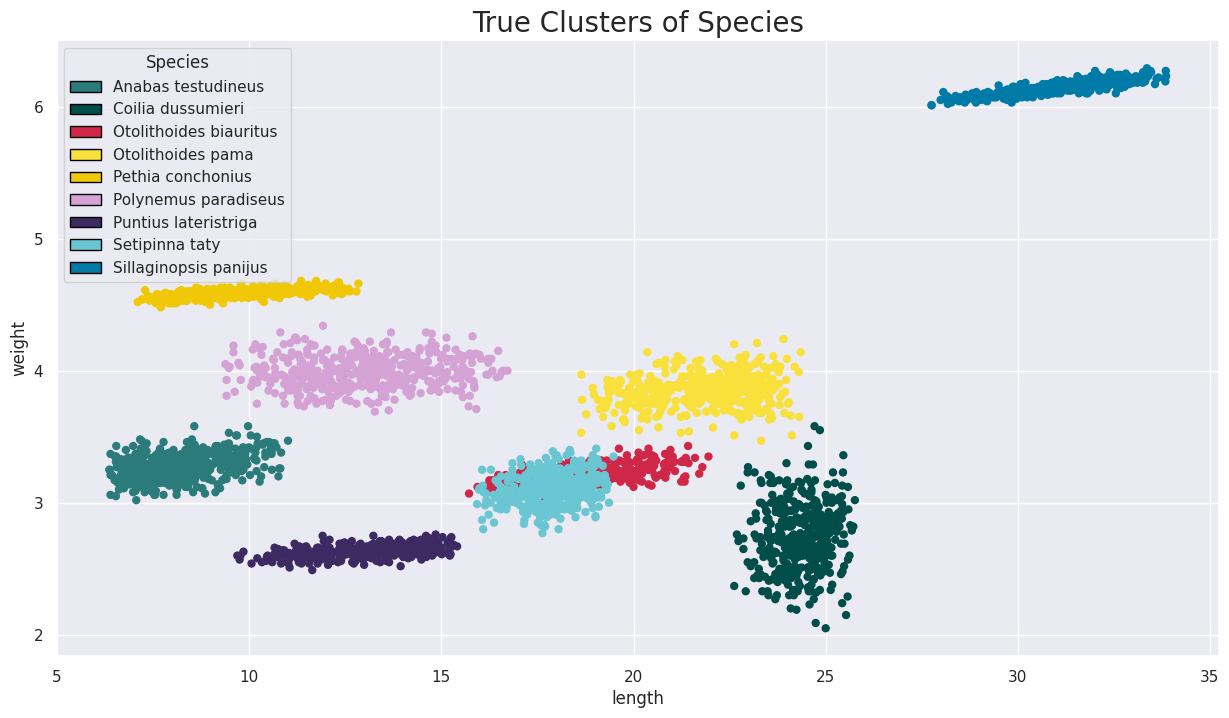

In [25]:
# Encode the target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a color array based on the encoded labels
colors = [palette2[i] for i in y_encoded]

# Scatter plot with encoded target variable
plt.figure(figsize=(15, 8))
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, s=25)

plt.title('True Clusters of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')

# Create custom legend by mapping original class names to colors
legend_labels = label_encoder.classes_  # Original class names

# Create custom legend using color patches from your palette
legend_elements = [Patch(facecolor=palette2[i], edgecolor='k', label=legend_labels[i]) for i in range(len(legend_labels))]

# Add the legend to the plot
plt.legend(handles=legend_elements, title="Species")

# Show the plot
plt.show()


<div style="
    text-align: center; 
    border-radius: 15px; 
    padding: 15px 20px; 
    margin: 10px auto; 
    font-size: 1.8em; 
    font-family: Arial, sans-serif; 
    background-color: #7209B7; 
    color: #FFFFFF; 
    overflow: hidden; 
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.25); 
    max-width: 1400px;">
    <strong>6. Conclusions</strong>
</div>

<div style="border: 2px solid #7209B7; padding: 15px; border-radius: 10px;">
    <p style="font-size: 16px;">
        - <strong>DBSCAN performed the best</strong>, creating well-separated clusters, though it identified 8 clusters instead of the expected 9.<br>
        - The true labels show that <strong>Setipinna taty</strong> and <strong>Otolithoides biauritus</strong> are closely located in feature space, making it difficult for any technique to separate them.<br>
        - <strong>No technique successfully separated</strong> Setipinna taty and Otolithoides biauritus.<br>
        - All techniques <strong>except DBSCAN misclassified Pethia conchonius</strong>, splitting it into two separate clusters.
    </p>
</div>
